In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from modules import *
from sim import *


In [3]:
sim = Sim(3, "alpha_eps0p01", "data_d29_l1_b2.npz", epsilon_SF=None)


Moving to directory '/home/za9132/scratch/romain/round3/alpha_eps0p01'.


### gas properties

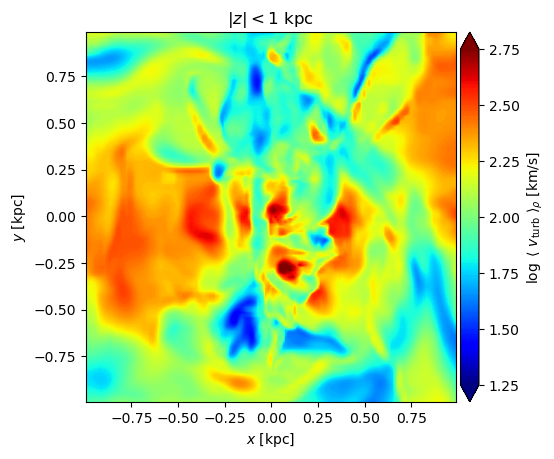

In [22]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.vel_turb, (10**(1.25), 10**(2.75)), unit=const.km, avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='jet', cbar_label=r'$\log~\langle~v_{\rm turb}~\rangle_\rho$ [km/s]', cbar_tick_increment=0.25, title=r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("v-proj-%s" % slice_label)


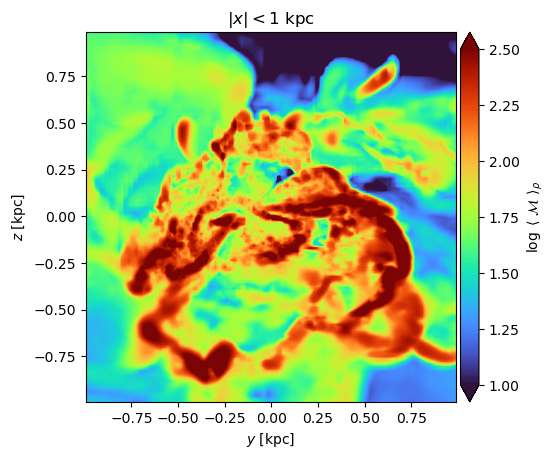

In [25]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.mach, (10**(1.), 10**(2.5)), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='turbo', cbar_label=r'$\log~\langle~\mathcal{M}~\rangle_\rho$', cbar_tick_increment=0.25, title=r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("mach-proj-%s" % slice_label)

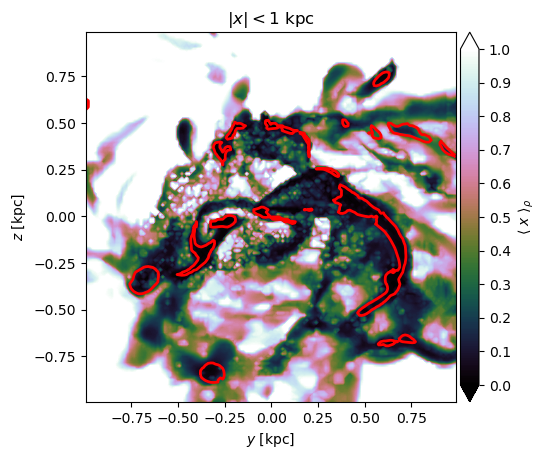

In [26]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.ion_frac, (0, 1), avg=True, slice=slice, title=r'$|%s| < 1~{\rm kpc}$' % slice_label, weight=sim.density, project=True, do_log=False, cmap='cubehelix', cbar_label=r'$\langle~x~\rangle_\rho$', cbar_tick_increment=0.1, isocontours=[const.temp_HII], isocontour_field=sim.temp, color_isocontour='red')

# sim.save_fig("temp-proj-%s" % slice_label)

### dust

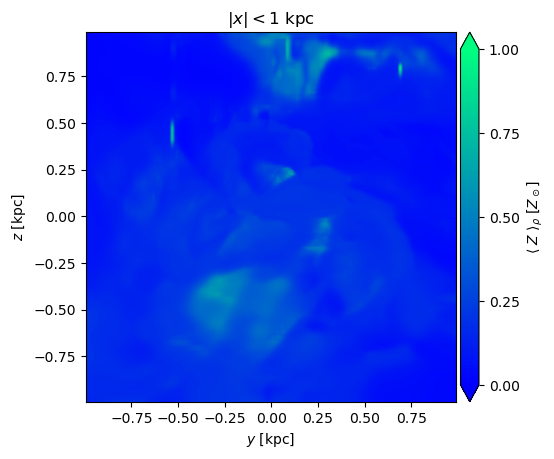

In [13]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.metallicity / const.Z_sol, (0, 1), avg=True, slice=slice, weight=sim.density, project=True, do_log=False, cmap='winter', cbar_label=r'$\langle~Z~\rangle_\rho$ [$Z_\odot$]', cbar_tick_increment=0.25, title=r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("metal-proj-%s" % slice_label)


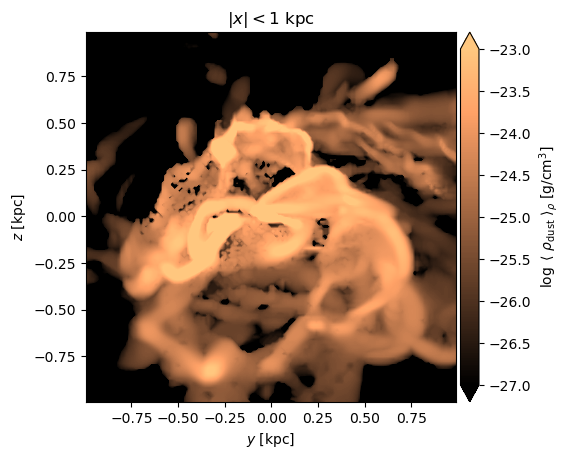

In [14]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.density_dust, (1e-27, 1e-23), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='copper', cbar_label=r'$\log~\langle~\rho_{\rm dust}~\rangle_\rho$ [${\rm g/cm^{3}}$]', cbar_tick_increment=0.5, title=r'$|%s| < 1~{\rm kpc}$' % slice_label)

# sim.save_fig("dust-proj-%s" % slice_label)


In [15]:
n_H_sph = sim.interp_to_sph(sim.n_H)
N_H = np.sum(n_H_sph * sim.dx_sph[R], axis=R)


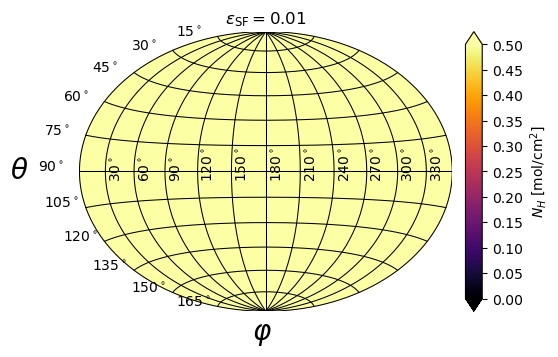

In [16]:
sim.plot(N_H, (0, 0.5), unit=const.N_A, do_log=False, cmap='inferno', num_axis_lines=12, cbar_tick_increment=0.05, cbar_label=r'$N_H$ [${\rm mol/cm^{2}}$]', title=sim.sim_latex, plot_type='AH') 

# sim.save_fig("dust-sph")


### angular momentum

In [4]:
h = np.cross(sim.coord, sim.vel_vec, axis=0)
h_tot = sim.calc_mean(h, weight=(sim.density * sim.dV), axis=(1, 2, 3), do_sum=True)
h_scalar = proj(h, h_tot[:, None, None, None])

Ldot = sim.interp_to_sph(h_scalar * sim.density * sim.vel_vec_sph_at_cart[R]) * sim.dA_hph
Ldot1d = sim.calc_mean(Ldot, axis=(1, 2), do_sum=True)


Text(0.5, 1.0, '$L_0$ is the angular momentum of $M_\\odot$ in a circular Keplerian orbit at $r = 1~{\\rm kpc}$')

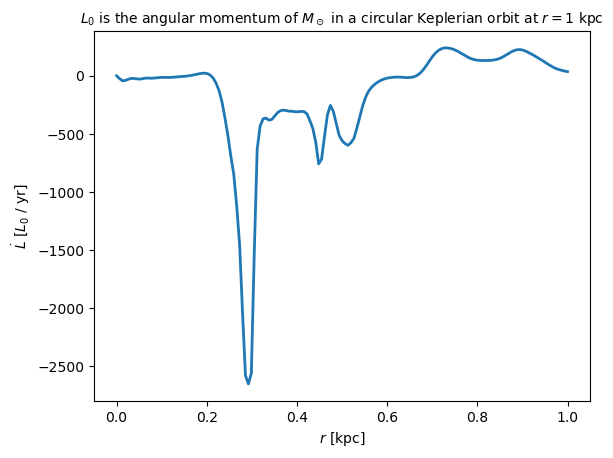

In [5]:
radius = 1 * const.kpc
M_enc = sim.calc_mean(sim.density * sim.dV, cond=(sim.coord_sph[R] < radius), do_sum=True)
L0 = const.M_sol * np.sqrt(const.G * M_enc * radius)

plt.plot(sim.coord1d_sph[R] / const.kpc, Ldot1d / (L0 / const.yr), lw=2)

plt.xlabel(r"$r$ [kpc]")
plt.ylabel(r"$\dot{L}$ [$L_0~/~{\rm yr}$]")

plt.title(r"$L_0$ is the angular momentum of $M_\odot$ in a circular Keplerian orbit at $r = %.3g~{\rm kpc}$" % (radius / const.kpc), fontsize=10)

# sim.save_fig("Ldot")

### accretion

In [6]:
Mdot = -sim.vel_vec_sph_at_cart[R] * sim.density * sim.dA_hph
Mdot_sph = sim.interp_to_sph(Mdot)
Mdot1d = sim.calc_mean(Mdot, axis=(H, PH), do_sum=True)
density_sph = sim.interp_to_sph(sim.density)


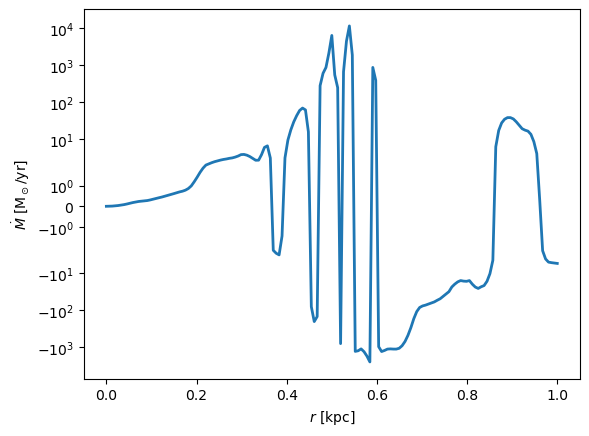

In [7]:
plt.plot(sim.coord1d_sph[R] / const.kpc, Mdot1d / (const.M_sol / const.yr), lw=2)

plt.xlabel(r"$r$ [kpc]")
plt.ylabel(r"$\dot{M}$ [${\rm M_\odot/yr}$]")

plt.yscale('symlog')

# sim.save_fig("Mdot")


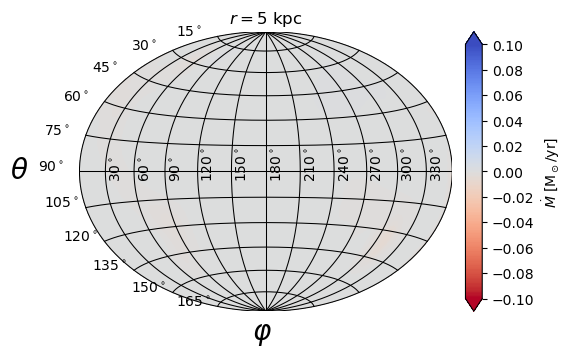

In [10]:
radius = 5. * const.kpc
radius_idx = np.argmin(np.abs(sim.coord1d_sph[R] - radius))

sim.plot(Mdot[radius_idx], unit=(const.M_sol / const.yr), extrema=(-1e-1, 1e-1), plot_type='AH', do_log=False, cmap='coolwarm_r', num_axis_lines=12, cbar_tick_increment=0.02, cbar_label=r'$\dot{M}$ [${\rm M_\odot/yr}$]', title=r"$r = %.3g~{\rm kpc}$" % (radius / const.kpc))

# sim.save_fig("Mdot-sph")


/usr/licensed/anaconda3/2023.3/lib/python3.10/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/licensed/anaconda3/2023.3/lib/python3.10/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Text(0.5, 1.0, '$r \\in [4.5, 5]~{\\rm kpc}$')

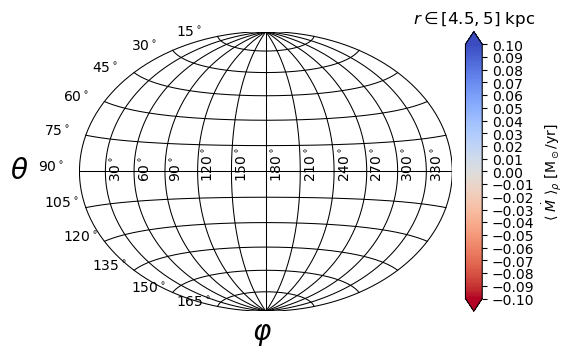

In [12]:
radius_in, radius_out = 4.5 * const.kpc, 5. * const.kpc
cond = (sim.coord_sph[R] < radius_out) * (sim.coord_sph[R] > radius_in)

Mdot_avg = sim.calc_mean(Mdot, weight=(density_sph * sim.dx_sph[R]), cond=cond, axis=R)

sim.plot(Mdot_avg, unit=(const.M_sol / const.yr), extrema=(-0.1, 0.1), plot_type='AH', do_log=False, cmap='coolwarm_r', num_axis_lines=12, cbar_tick_increment=0.01, cbar_label=r'$\langle~\dot{M}~\rangle_\rho$ [${\rm M_\odot/yr}$]')

plt.title(r"$r \in [%.3g, %.3g]~{\rm kpc}$" % (radius_in / const.kpc, radius_out / const.kpc))

# sim.save_fig("Mdot-sph-avg")


### 1d profiles

In [27]:
r1d, temp1d = sim.calc_radial_profile(sim.temp, weight=sim.density, nbins=100)


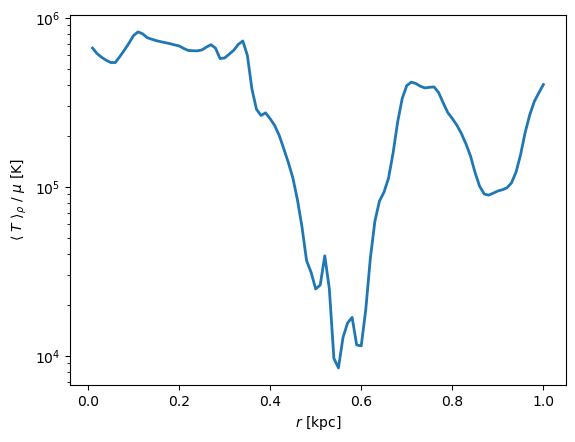

In [28]:
plt.plot(r1d / const.kpc, temp1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~T~\rangle_\rho~/~\mu$ [K]')

plt.yscale('log')

# sim.save_fig("temp-1d")

In [29]:
r1d, energy_turb1d = sim.calc_radial_profile(sim.energy_turb, weight=sim.density, nbins=100)
vel_turb1d = np.sqrt(2 * energy_turb1d)


Text(0, 0.5, '$\\langle~v_{\\rm turb}~\\rangle_\\rho$ [km/s]')

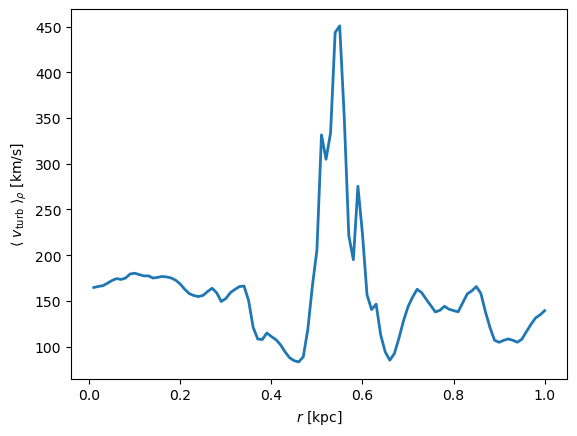

In [30]:
plt.plot(r1d / const.kpc, vel_turb1d / (const.km), lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~v_{\rm turb}~\rangle_\rho$ [km/s]')

# sim.save_fig("v-turb-1d")


### refinement

<Axes: title={'center': '$x = 0~{\\rm kpc}$'}, xlabel='$y$ [kpc]', ylabel='$z$ [kpc]'>

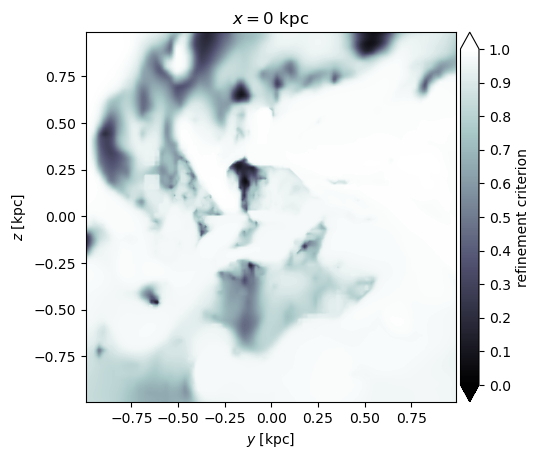

In [31]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.ref_crit, (0., 1.), slice=slice, title=r'$%s = 0~{\rm kpc}$' % slice_label, project=False, do_log=False, cmap='bone', cbar_label='refinement criterion', cbar_tick_increment=0.1)

# sim.save_fig("refine-proj-%s" % sli

### turbulence forcing

<Axes: title={'center': '$x = 0~{\\rm kpc}$'}, xlabel='$y$ [kpc]', ylabel='$z$ [kpc]'>

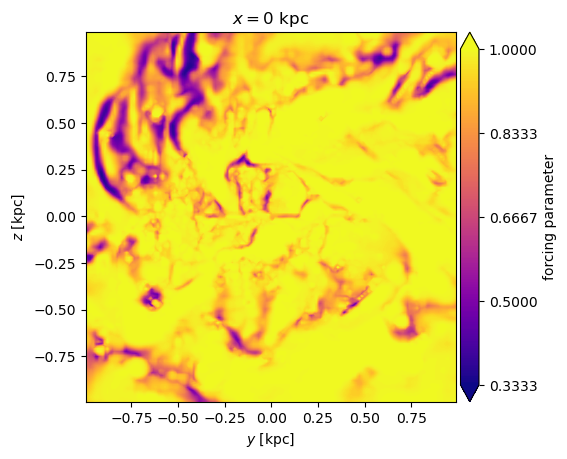

In [32]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot("b_turb", (1/3., 1.), slice=slice, project=False, avg=True, weight=sim.density, do_log=False, cmap='plasma', cbar_label='forcing parameter', cbar_tick_increment=1/6, title=r'$%s = 0~{\rm kpc}$' % slice_label)

# sim.save_fig("turb-forcing-%s" % slice_label)

